In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_no = 2
bg = cv2.imread("img_raw/bg.png")
img1 = cv2.imread(f"img_raw/{image_no}.png")
img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

(left, upper, right, lower) = (572, 271, 1330, 940)
bg = bg[upper:lower, left:right]
img1 = img1[upper:lower, left:right]
img1_hsv = img1_hsv[upper:lower, left:right]

bg_gray = cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [3]:
cv2.imshow('bg',bg)
cv2.imshow('1',img1)
cv2.imshow('2',img1_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
img_sub = cv2.subtract(img1, bg)
img_sub = cv2.cvtColor(img_sub, cv2.COLOR_BGR2GRAY)

In [5]:
ret,thresh1 = cv2.threshold(img_sub,5,255,cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(thresh1,kernel,iterations = 2)
erosion = cv2.erode(dilation,kernel,iterations = 2)

In [6]:
cv2.imshow('bg_sub', img_sub)
cv2.imshow('thresh1', thresh1)
cv2.imshow('erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
retval,labels = cv2.connectedComponents(erosion)

# Plot function

In [8]:
def plot_hist(im, mask):
    chans = cv2.split(im)
    colors = ("b", "g", "r")
    
    plt.figure()
#     plt.title("'Flattened' Color Histogram")
#     plt.xlabel("Bins")
#     plt.ylabel("# of Pixels")
    
    hist_arr = []
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    
    # loop over the image channels
    for (chan, color) in zip(chans, colors):
        plt.title("'Flattened' Color Histogram")
        plt.xlabel("Bins")
        plt.ylabel("# of Pixels")
        
        hist = cv2.calcHist([chan], [0], mask, [128], [0, 256])
        norm_hist = cv2.normalize(hist, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        hist_arr.append(norm_hist)
        # plot the histogram
        axes[0].plot(norm_hist, color = color)
        axes[0].set_xlim([0, 128])
    
    axes[1].imshow(im[::,::,::-1])
    plt.show()    
    plt.close()
    
    return hist_arr

image no. 2
(669, 758, 3)


<Figure size 432x288 with 0 Axes>

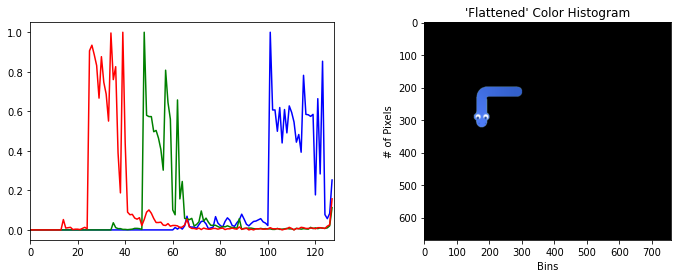

<Figure size 432x288 with 0 Axes>

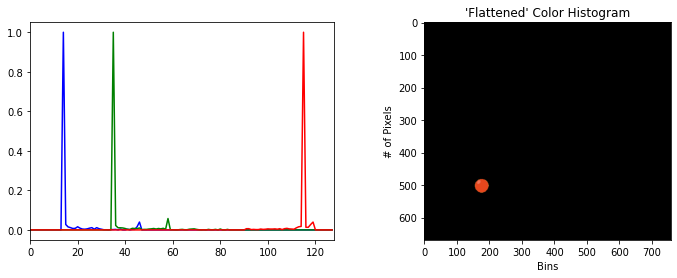

In [9]:
print(f"image no. {image_no}")
img1 = np.array(img1)
print(img1.shape)

for i in range(1, retval):
    mask = np.zeros(labels.shape, dtype=np.uint8)
    mask[labels == i] = 255
    
    masked = cv2.bitwise_and(img1, img1, mask=mask)
    
    dir_path = f"img_proc/img_{image_no}"
    if(not os.path.exists(dir_path)):
        os.mkdir(dir_path)
    
    mask_filename = f"img_proc/img_{image_no}/mask_item_{i}.png"
    cv2.imwrite(mask_filename, mask)

    res = cv2.bitwise_and(img1, img1, mask = mask)
    filename = f"img_proc/img_{image_no}/item_{i}.png"
    cv2.imwrite(mask_filename, res)
    
#     cv2.imshow('component', mask)
    cv2.imshow('masked', res)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    hist_arr = plot_hist(res, mask)
    
plt.close()

# Segmentation Function

In [10]:
def image_segmentation(image_no):
    bg = cv2.imread("img_raw/bg.png")
    img1 = cv2.imread(f"img_raw/{image_no}.png")
    img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

    (left, upper, right, lower) = (572, 271, 1330, 940)
    bg = bg[upper:lower, left:right]
    img1 = img1[upper:lower, left:right]

    bg_gray = cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

    img_sub = cv2.subtract(img1, bg)
    img_sub = cv2.cvtColor(img_sub, cv2.COLOR_BGR2GRAY)

    ret,thresh1 = cv2.threshold(img_sub,5,255,cv2.THRESH_BINARY)

    kernel = np.ones((3,3),np.uint8)
    dilation = cv2.dilate(thresh1,kernel,iterations = 2)
    erosion = cv2.erode(dilation,kernel,iterations = 2)
    
#     cv2.imshow('erosion', erosion)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
    retval,labels = cv2.connectedComponents(erosion)
    
    print(f"image no. {image_no}")
    hist_arr_img = []
    for i in range(1, retval):
        mask = np.zeros(labels.shape, dtype=np.uint8)
        mask[labels == i] = 255

        masked = cv2.bitwise_and(img1, img1, mask=mask)

        dir_path = f"img_proc/img_{image_no}"
        if(not os.path.exists(dir_path)):
            os.mkdir(dir_path)

        mask_filename = f"img_proc/img_{image_no}/mask_item_{i}.png"
        cv2.imwrite(mask_filename, mask)

        res = cv2.bitwise_and(img1, img1, mask = mask)
        filename = f"img_proc/img_{image_no}/item_{i}.png"
        cv2.imwrite(filename, res)
        
#         cv2.imshow(f"masked_{i}", res)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()

        hist_arr = plot_hist(res, mask)
        hist_arr_img.append(hist_arr)
    
    return hist_arr_img

image no. 1


<Figure size 432x288 with 0 Axes>

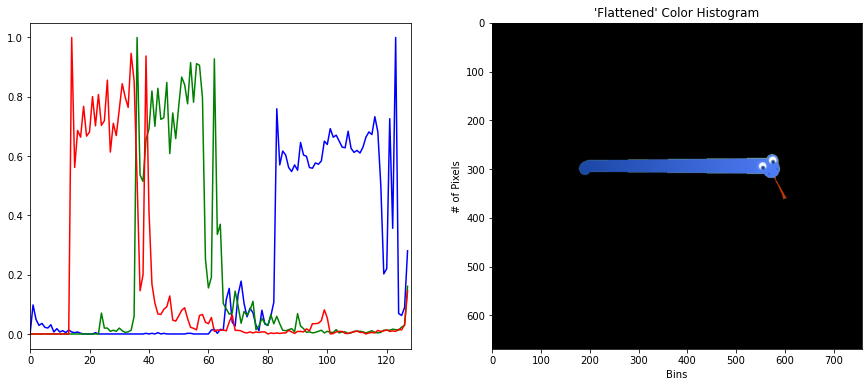

<Figure size 432x288 with 0 Axes>

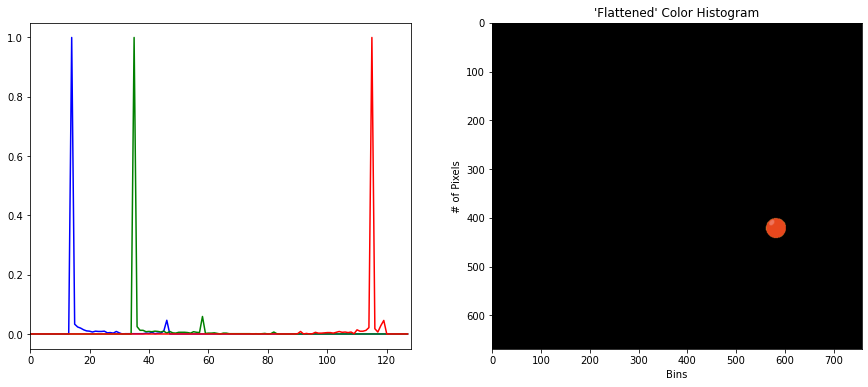

image no. 2


<Figure size 432x288 with 0 Axes>

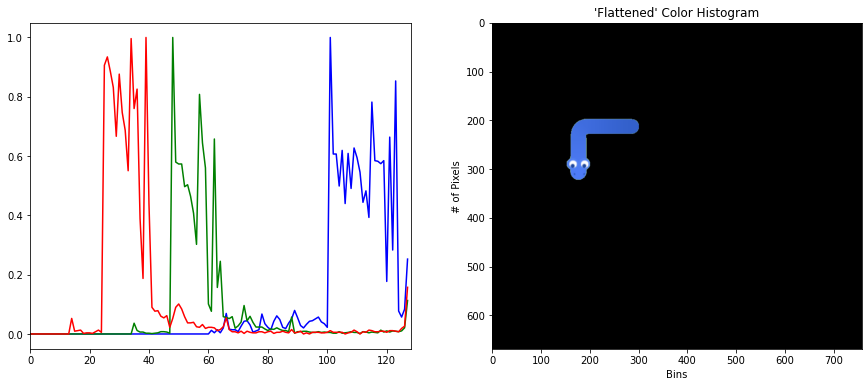

<Figure size 432x288 with 0 Axes>

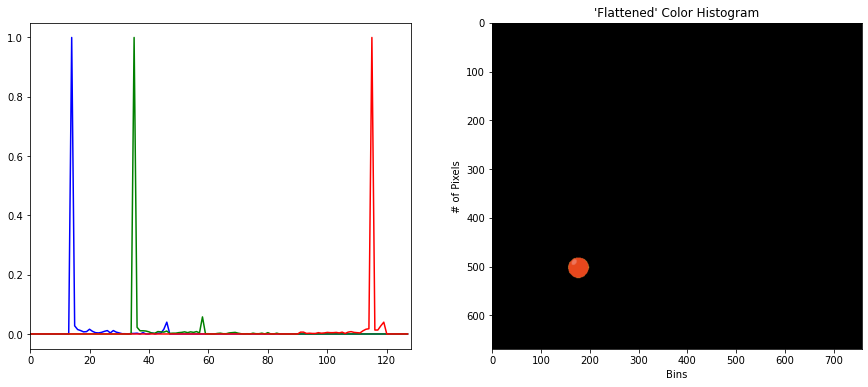

image no. 3


<Figure size 432x288 with 0 Axes>

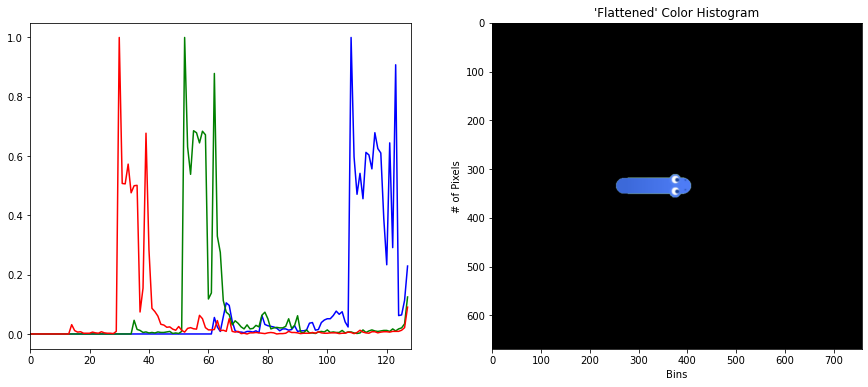

<Figure size 432x288 with 0 Axes>

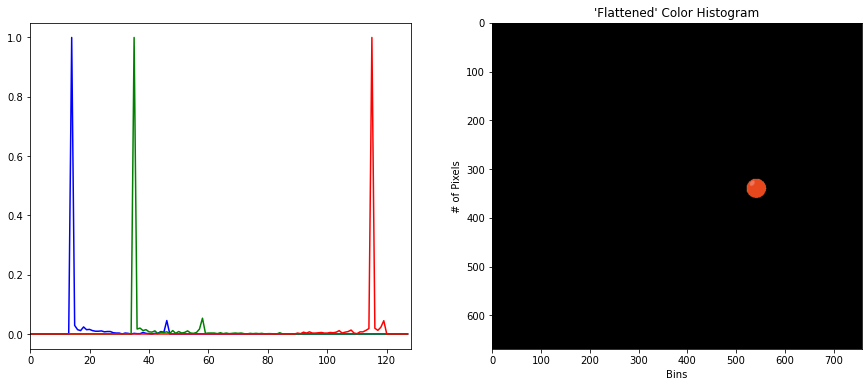

image no. 4


<Figure size 432x288 with 0 Axes>

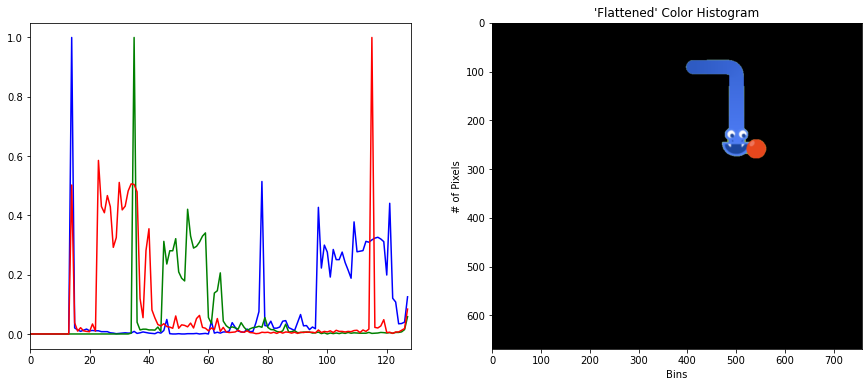

image no. 5


<Figure size 432x288 with 0 Axes>

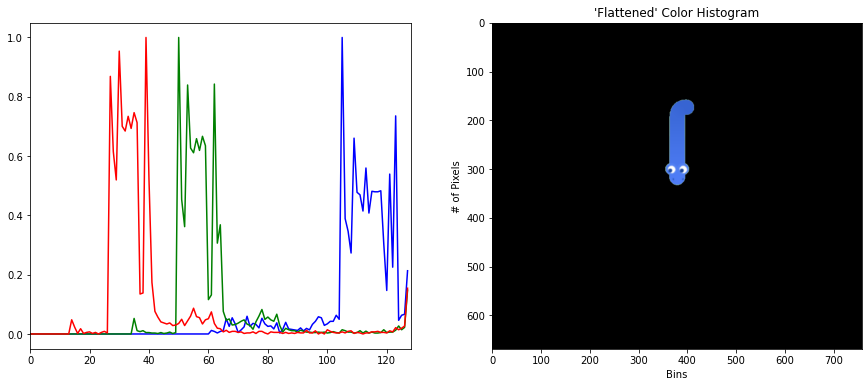

<Figure size 432x288 with 0 Axes>

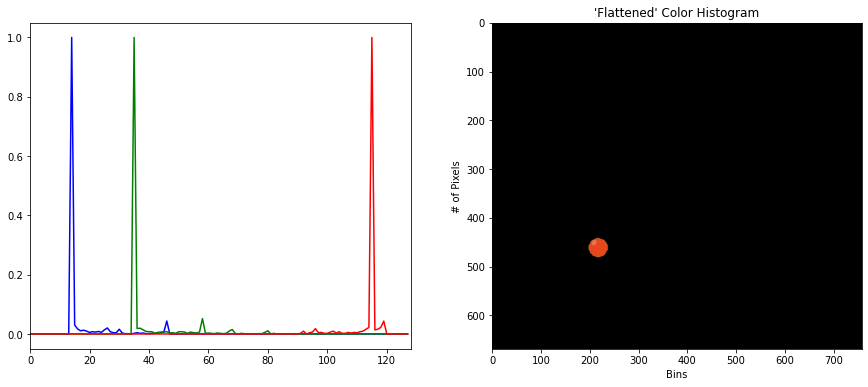

image no. 6


<Figure size 432x288 with 0 Axes>

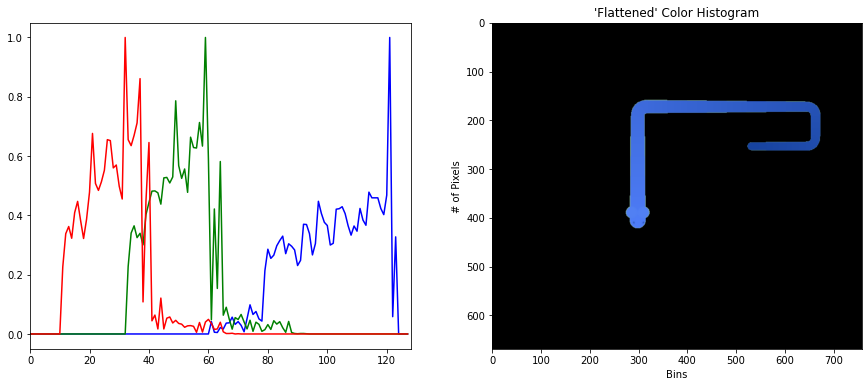

<Figure size 432x288 with 0 Axes>

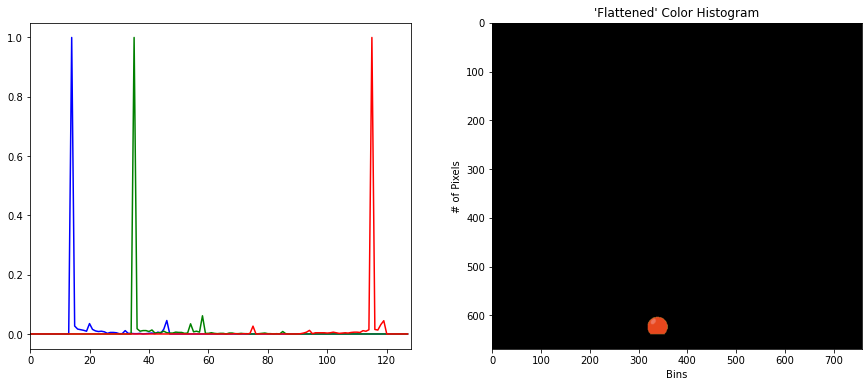

image no. 7


<Figure size 432x288 with 0 Axes>

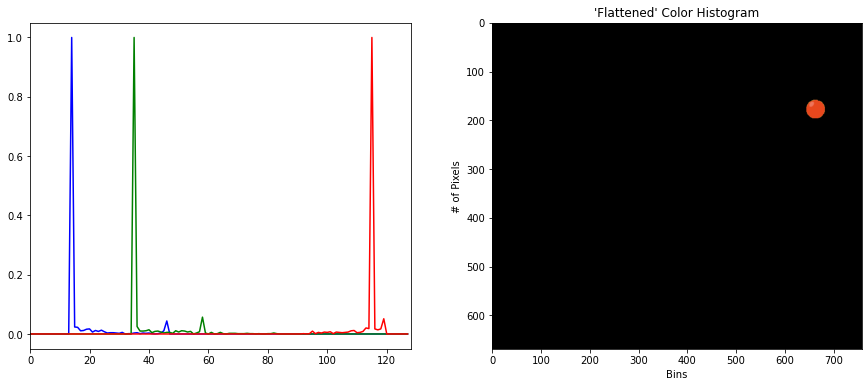

<Figure size 432x288 with 0 Axes>

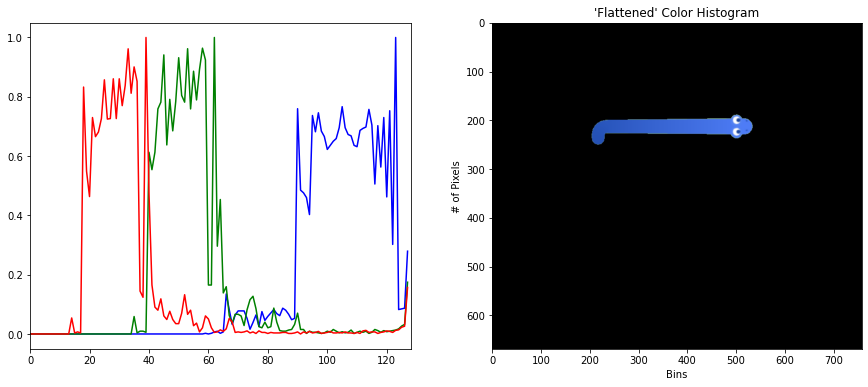

image no. 8


<Figure size 432x288 with 0 Axes>

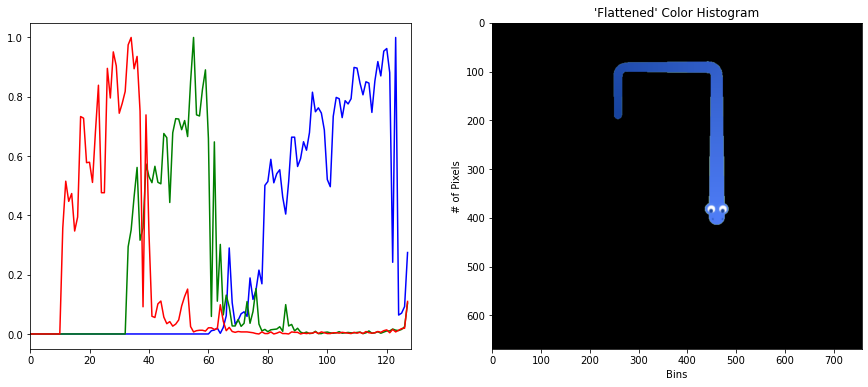

<Figure size 432x288 with 0 Axes>

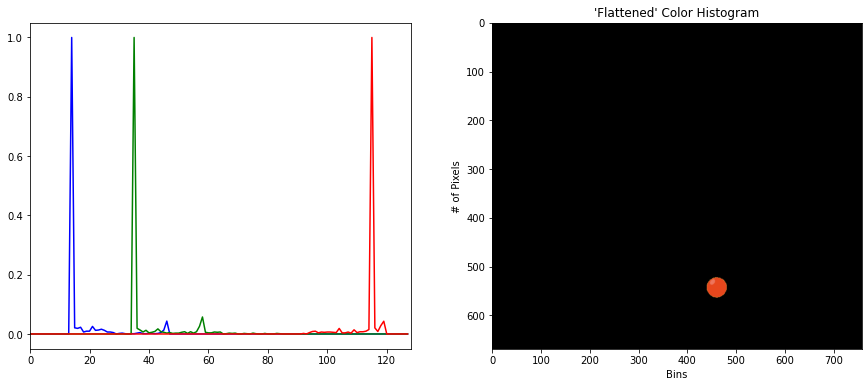

image no. 9


<Figure size 432x288 with 0 Axes>

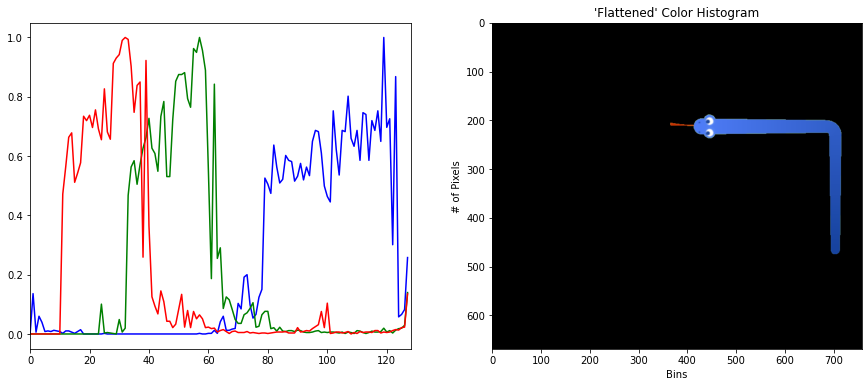

<Figure size 432x288 with 0 Axes>

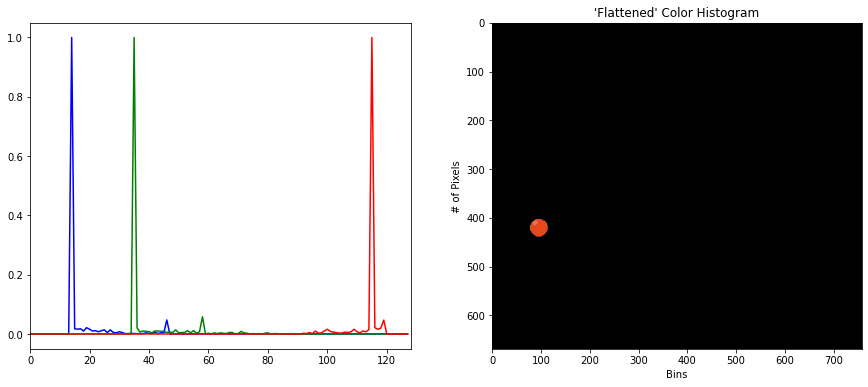

image no. 10


<Figure size 432x288 with 0 Axes>

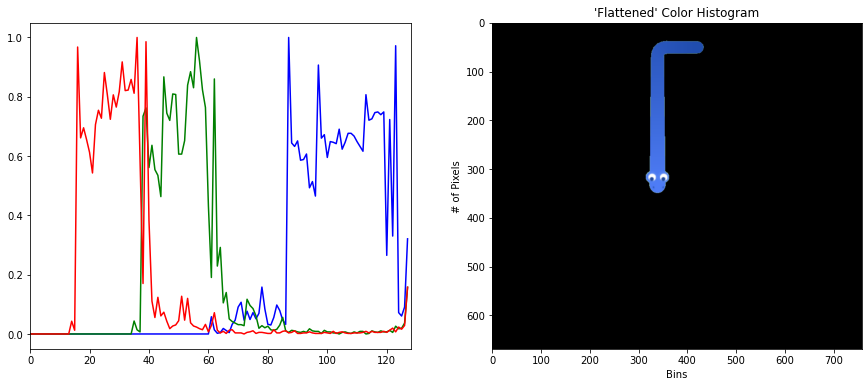

<Figure size 432x288 with 0 Axes>

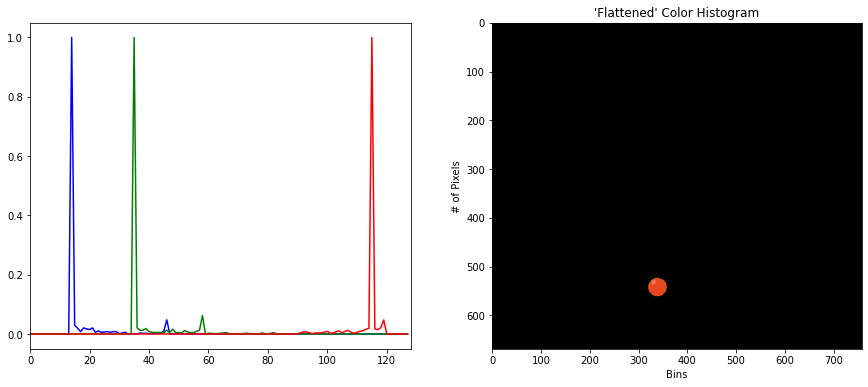

In [11]:
all_hist = []
for i in range(1, 11):
    hist_arr_img = image_segmentation(i)
    hist_arr_img = np.array(hist_arr_img)
    all_hist.append(hist_arr_img)

In [12]:
colors = ["b", "g", "r"]
x = [0,1,2,3,4,5,6,7,8,9,9]
y = [0,0,0,0,0,0,1,0,0,0,1]

all_hist = np.array(all_hist)
print(all_hist.shape)
print(len(all_hist[3]))

for idx in range(len(x)-1):
    print(f"image: {idx} and {idx+1}")
    hist1 = all_hist[x[idx]][y[idx]]
    hist2 = all_hist[x[idx+1]][y[idx+1]]
    for i in range(3):
        diff = cv2.compareHist(hist1[i], hist2[i], cv2.HISTCMP_CORREL)
        print(f"{colors[i]}: {diff}")

#     for i in range(3):
#         plt.plot(hist1[i], color=colors[i])
#         plt.xlim([0, 256])
#     plt.show()

#     for i in range(3):
#         plt.plot(hist2[i], color=colors[i])
#         plt.xlim([0, 256])
#     plt.show()

(10,)
1
image: 0 and 1
b: 11.802556479422758
g: 11.39063242762856
r: 9.76159626881143
image: 1 and 2
b: 6.165065759506346
g: 6.04118103230376
r: 6.098639193468779
image: 2 and 3
b: 28.03134080524546
g: 161.87851987117796
r: 579.3220611964268
image: 3 and 4
b: 11.177509526202833
g: 14.115746529711664
r: 8.675836872833278
image: 4 and 5
b: 122.70323246862392
g: 1039.5757756132693
r: 755.5149307153856
image: 5 and 6
b: 13.238548633119581
g: 15.196306710854321
r: 10.04773976497613
image: 6 and 7
b: 48.64239736619809
g: 168.02185625492757
r: 216.133960370425
image: 7 and 8
b: 3.0656738033701694
g: 3.74232209644502
r: 12.593516165855176
image: 8 and 9
b: 7.016234987386529
g: 4.094877496871045
r: 4.51513423646353
image: 9 and 10
b: 26.27674408815801
g: 40.1103916393122
r: 130.20897317710708


c:\python37\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """
